# VIP, Vortex Image Processing pipeline

*Tutorial version 0.3.2 (2015/11/08)* 

*Author: Carlos Gomez Gonzalez*

# Table of contents

* [1. VIP pipeline introduction](#1.-VIP-pipeline)
    - [1.1. What is it?](#1.1.-What-is-it?)
    - [1.2. Motivation](#1.2.-Motivation)
    - [1.3. How to get VIP?](#1.3.-Where-to-get-VIP?)
    - [1.4. How to install it?](#1.4.-How-to-install-it?)
    - [1.5. How to cite VIP?](#1.5.-How-to-cite-VIP?)
    
* [2. Package structure](#2.-Package-structure)
    - [2.1. Calib](#2.1.-Calib)
    - [2.2. Conf](#2.2.-Conf)
    - [2.3. Exlib](#2.3.-Exlib)
    - [2.4. Fits](#2.4.-Fits)
    - [2.5. Madi](#2.5.-Madi)
    - [2.6. Pca](#2.6.-Pca)
    - [2.7. Negfc](#2.7.-Negfc)
    - [2.8. Phot](#2.8.-Phot)
    - [2.9. Stats](#2.9.-Stats)
    - [2.10. Var](#2.10.-Var)
    
* [3. Short tutorial](#3.-Short-tutorial)
    - [3.1 Importing VIP](#3.1.-Importing-VIP)
    - [3.2. Getting the data: ADI cube](#3.2.-Getting-the-data:-ADI-cube)
    - [3.3. Pre-processing of ADI data](#3.3.-Pre-processing-of-ADI-data)
    - [3.4. ADI median subtraction](#3.4.-ADI-median-subtraction)
    - [3.5. Detection function](#3.5.-Detection-function)
    - [3.6. Full-frame PCA](#3.6.-Full-frame-PCA)
    - [3.7. Local PCA](#3.7.-Local-PCA)
    - [3.8. SNR map generation](#3.8.-SNR-map-generation)
    - [3.9. Flux and position estimation](#3.9.-Flux-and-position-estimation)
        - [3.9.1. Nelder-Mead based optimization](#3.9.1.-Nelder-Mead-based-optimization)
        - [3.9.2. Planet removal using negative fake companion technique](#3.9.2.-Planet-removal-using-negative-fake-companion-technique)
        - [3.9.3. Negative fake companion coupled with MCMC ](#3.9.3.-Negative-fake-companion-coupled-with-MCMC)
            - [3.9.3.1. Visualizing the MCMC chain: corner plots and walk plots](#3.9.3.1.-Visualizing-the-MCMC-chain:-corner-plots-and-walk-plots)
            - [3.9.3.2. Highly probable values and confidence intervals](#3.9.3.2.-Highly-probable-values-and-confidence-intervals)
    - [3.10. Throughput](#3.10.-Throughput)
    - [3.11. Contrast curve generation](#3.11.-Contrast-curve-generation)
    - [3.12. Generating synthetic planets](#3.12.-Generating-synthetic-planets)
    - [3.13. Processing RDI data](#3.13.-Processing-RDI-data)
        - [3.13.1. PCA with a reference](#3.13.1.-PCA-with-a-reference)
        - [3.13.2. Flux and position estimation for RDI](#3.13.2.-Flux-and-position-estimation-for-RDI)
    - [3.14. Processing IFS data](#3.14.-Processing-IFS-data)
        - [3.14.1. PCA of a single multi-spectral frame](#3.14.1.-PCA-of-a-single-multi-spectral-frame)
        - [3.14.2. Two-stage PCA of several multi spectral frames](#3.14.2.-Two-stage-PCA-of-several-multi-spectral-frames)
    - [3.15. Additional functionality](#3.15.-Additional-functionality)
        - [3.15.1. Bad frames detection](#3.15.1.-Bad-frames-detection)
        - [3.15.2. Centering with Radon Transform](#3.15.2.-Centering-with-Radon-Transform)
    - [3.16. Final words](#3.16.-Final-words)

## 1. VIP pipeline introduction 

### 1.1. What is it?

Vortex Image Processing (VIP) is a package/pipeline for angular, reference star and spectral differential high-contrast imaging written in Python 2.7.

VIP is being developed within the VORTEX team ([webpage](http://www.vortex.ulg.ac.be/)).
The source code is in alpha version meaning that the code will change drastically before the
first release version. If you want to report a bug, suggest a feature or even add one please contact the main developer at cgomez [at] ulg.ac.be or through github. Any feedback will be greatly appreciated.

[Go to the top](#Table-of-contents)

### 1.2. Motivation

#### 1.2.1. Why VIP?

Our goal is to provide robust, efficient (as fast as possible), easy-to-use, well- documented and open-source implementations of high-contrast image processing algorithms to the scientific community. 

The main repository of VIP resides in Github, the "house" of most of the modern scientific open-source python code, using Git as a version control system. Git is a distributed revision control and source code management system developed by Linus Torvalds for Linux kernel development back in 2005. You may be familiar with other version control systems such as SVN, Mercurial or CVS. Github is a GIT repository hosting service with an amazing web front-end for source-code management and collaboration. It provides features such as access control, bug tracking, feature requests, task management, and wikis for every project. 

The code starts as the main product of my PhD first year, which focus is on studying new algorithms for high-contrast imaging and exoplanet detection. Since then it has matured enough to be used by scientists outside our core-team. There is a paper in preparation about VIP. Please cite Gomez Gonzalez et al. 2016 (in prep) whenever you publish data reduced with VIP.

Our first low-rank plus sparse decomposition based algorithm, LLSG, will be soon integrated in VIP (paper is in peer-revision process). 

#### 1.2.2. Why Python?

VIP is written in Python 2.7. It was chosen for being an open-source high-level programming language, able to express a large amount of functionality per line of code. Python has a vast ecosystem of scientific open-source libraries/packages (e.g. numpy, scipy, scikit-learn, scikit-image) and many well-known codes have python bindings as well (e.g. opencv). 

On top of that exist this great tool, the Jupyter (né IPython) notebook. A notebook file is simple a JSON document, containing text, source code, rich media output, and metadata. It allows to combine data analysis and visualization into an easily sharable format. This tutorial is an example of a Jupyter notebook.

[Go to the top](#Table-of-contents)

### 1.3. Where to get VIP? 

We manage the code in a Github public repository:

https://github.com/vortex-exoplanet/VIP

You can clone the repository from the github repository. For cloning the repository first you need to get Git running on your system, then execute:

```$ git clone https://github.com/vortex-exoplanet/VIP.git```

Optionally you can go to the webpage and download a zip file of the source code.

[Go to the top](#Table-of-contents)

### 1.4. How to install it?

The setup is pretty much automatic. Before installing VIP, you must setup a python distribution on you machine such as Canopy, Anaconda or MacPorts. My personal recomendation is to use Anaconda, so I will assume you have Anaconda for the following steps.

VIP ships a stripped-down version of RO.DS9 (Russell Owen) for convenient 
xpaset/xpaget based interaction with DS9. VIP contains a class vipDS9 that works
on top of RO.DS9 containing several useful methods for DS9 control such as 
displaying arrays, manipulating regions, controlling the display options, etc. 
VipDS9 functionality will only be available if you have DS9 and XPA installed 
on your system PATH. 

Opencv  (Open source Computer Vision) provides fast c++ image processing functionalities and is used by VIP (whenever it's possible) instead of python based libraries such as ndimage or scikit-image. This dependancy is tricky to get install/compile, but having Anaconda python distribution the process takes just a command (given that you have a C compiler installed in your system, like g++). We'll use conda (core component of Anaconda) in this shell/terminal command:

```$ conda install opencv ```

A setup.py file (Setuptools Python package) is included in the root folder of 
VIP. It takes care of installing most of the requirements for you. VIP depends on 
existing packages from the Python ecosystem, such as numpy, scipy, matplotlib, 
pandas, astropy, scikit-learn, scikit-image, photutils, emcee, etc.


For running the VIP setup execute:

```$ python setup.py install ```

The code is in continuous development and will be changing often. It's prefered 
to run the setup with the develop flag:

```$ python setup.py develop ```

If you used the "develop" flag and moved the VIP folder to any other location in your file system, please re-run the above command.

In either case, the setup script will take a couple of minutes, until all the requirements are satisfied. Some dependancies, like photutils, hang the setup of VIP. If you noitice this just kill the setup (with Ctrl+C) and re-start it. It is planned to register VIP in the PIP index of Python packages which will make the process even more straightforward.

[Go to the top](#Table-of-contents)

### 1.5. How to cite VIP?

The paper describing VIP is in preparation. Please cite Gomez Gonzalez et al. 2016 (in prep.) whenever you publish data reduced with VIP. Also, please gives us a star in github (you must login) to let us keep track of who is using our package. Unfortunately there aren't many other ways to know who uses open-source codes.

[Go to the top](#Table-of-contents)

## 2. Package structure

Basic image processing functionalities are available e.g. image registration, image rotation, pixel temporal and spatial subsampling, bad frame detection, among others. The Point Spread Function (PSF) subtraction and speckle noise removal, for this development version, are based on Principal Component Analysis (PCA) or Karhunen–Loeve transform. The PCA algorithm can work on the whole frames or in localized patches performing frame selection based on the amount of field rotation. Flux and position are estimated using the Negative Fake Companion technique. Also, basic median frame subtraction is included as in the original ADI routine. Other functionalities included are: pre-processing steps (recentering, bad frames detection, etc) Signal-to-noise ratio (SNR) estimation, SNR map generation, algorithm throughput and fake companion injection.

In [1]:
import vip

In [2]:
dir(vip)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'calib',
 'conf',
 'exlib',
 'fits',
 'madi',
 'negfc',
 'pca',
 'phot',
 'stats',
 'var']

[Go to the top](#Table-of-contents)

### 2.1. Calib

The subpackage __"calib"__ contains some useful cosmetics and pre-processing functionalities: 
- resizing frames and cubes : upscaling/pixel binning (opencv fast processing),
- shifting frames (opencv fast processing),
- rotating frames and cubes (opencv fast processing), 
- cropping frames and cubes (numpy fast indexing),
- removing bad pixels from frames and cubes,
- correcting nan values from frames and cubes,
- detecting bad frames in cubes, using:
    - pixel statistics in annulus or circular aperture,
    - ellipticity of a point like source,
    - frames correlation,
- temporal subsampling of cubes (mean, median, trimmed mean),
- registration (re-centering) of frames, using:
    - center of mass,
    - centroid fitting a 2d gaussian or moffat,
    - DFT upsampling or fourier cross-correlation (Guizar et al. 2008),
    - radon transform for broadband frames (Pueyo et al. 2014).

Astronomical calibration functionality like flat fielding and dark-sky subtraction, in spite of its simplicity was not included in VIP due to the intrinsic complexity of dealing with heterogeneous datasets coming from different observatories (different data storage and handling). You can perform this in python in procedures of a few lines or using dedicated instrument pipelines such as esorex (ESO).

[Go to the top](#Table-of-contents)

### 2.2. Conf

Subpackage __"conf"__ contains configuration functions and internal utilities.

[Go to the top](#Table-of-contents)

### 2.3. Exlib

Subpackage __"exlib"__ contains external libraries self contained in VIP. For the moment only some DS9 bindings (by Andrew Williams, extract from RO python package).

[Go to the top](#Table-of-contents)

### 2.4. Fits

Subpackage __"fits"__ includes fits handling functions:
- fits opening
- fits info
- fits writing
- appending extensions to a fit file
- ADI cube opening (cube with PA attached as HDU extension)
- DS9 array and fits displaying

[Go to the top](#Table-of-contents)

### 2.5. Madi

Subpackage __"madi"__ has the ADI cube basic processing (Marois et al. 2006): median frame subtraction, and annular mode where 4 closest frames taking into account a PA threshold are median collapsed and subtracted.

[Go to the top](#Table-of-contents)

### 2.6. Pca

In subpackage __"pca"__ are the PCA based algorithms (Soumer et al. 2012 and Amara et al. 2012) for cubes reference-PSF/background subtraction. PCA comes in different flavors and with speed modifications:

- **Full-frame PCA**, using the whole cube as the PCA reference library in the case of ADI or SDI (ISF cube), or a sequence of reference frames (refere star) in the case of RDI. For ADI a big data matrix NxP, where N is the number of frames and P the number of pixels in a frame is created. Then PCA is done through eigendecomposition of the covariance matrix (~$DD^T$) or the SVD of the centered data matrix. SVD can be calculated using different libraries including a very fast one (default option): randomized SVD (Halko et al. 2009).

 
- **Annular PCA**, and **subannular PCA** (quadrants of annulus) perform a local PCA taking into account a Parallactic Angle rejection for allowing FOV rotation and avoid planet self-subtraction. These local PCA algorithms process many (number of patches times number of frames) smaller matrices increasing the computation time.


- **parallel subannular PCA** which uses multiprocessing and allows to distribute the computations amongst the available cores in your machine.

[Go to the top](#Table-of-contents)

### 2.7. Negfc

Credits to our group's MCMC guru Olivier Wertz.

Subpackge __"negfc"__ contains an ensemble of algorithms for planet position and flux detemination. The main method is based on the negative fake companion (NegFC) technique coupled with Markov chain Monte Carlo (MCMC).

The main idea of the NegFC is to inject negative fake companions (candidates)
with varying position and flux in order to minimize a function of merit. This function of merit is defined as:

$chi^2 = sum(|I_j|)$, 

where $j \in {1,...,N}$ and $N$ the total number of pixels contained in a circular aperture (4xfwhm) centered on the injection position. This $chi^2$ is measured on the PCA-processed frame. Thanks to the use of **emcee** and its Affine Invariant MCMC we can get the posterior distributions of the positions and fluxes allowing us to define proper error-bars for the photometry and position of the companion. 

[Go to the top](#Table-of-contents)

### 2.8. Phot

Subpackage __"phot"__ includes functionalities such as:
- signal-to-noise (SNR) estimation,
- SNR map generation,
- detection of point like sources (for pipelines),
- fake companions injection,
- algorithms throughput,
- contrast curve generation.

[Go to the top](#Table-of-contents)

### 2.9. Stats

Subpackage __"stats"__ contains functionalities such as:
- extracting statistics (mean, median, std dev, sum) in regions of a frame or cube,
- median aboslute deviation,
- sigma filtering of pixels in frames,
- distance (correlation) between the frames in a cube,
- distance (correlation) between a cube and a reference frame.

[Go to the top](#Table-of-contents)

### 2.10. Var

Subpackage __"var"__ has helping functions such as image filtering, shapes extraction (annulus, squares subimages, circular apertures), plotting, etc.

[Go to the top](#Table-of-contents)

## 3. Short tutorial

### 3.1. Importing VIP

For interactive mode execute Ipython shell and import the package:

``` >>> import vip ```

You might use instead a Jupyter Notebook (even a copy of this one!) as a frontend for Ipython. In this case create a new "code" cell en execute the commands.

For reviewing all the subpackages available:

``` vip.<TAB> ```

For displaying the docstring (internal documentation) use question mark:

```>>> vip.<subpackage>.<function or class name>?   ```

In [3]:
vip.pca.pca?

Let's create some convenient aliases and execute the command that will allow us loading figures inside the notebook:

In [4]:
%matplotlib inline
from matplotlib.pyplot import *
import numpy as np

plots = vip.var.pp_subplots

We can also instanciate a vipDS9 windows for interacting with DS9:

In [5]:
ds9 = vip.fits.vipDS9()

Remember to use ```ds9.<TAB>``` to see the available methods of the ds9 object.

At this point I recommend to copy this folder (./tutorial/) somewhere else so you can modify it at your will (without making changes to the respository you just cloned, in case you did).

[Go to the top](#Table-of-contents)

### 3.2. Getting the data: ADI cube

In the same folder where this notebook is located you can find a toy ADI (Angular Differential Imaging) cube and a NACO PSF to demostrate the capabilities of VIP. This is a L-band NACO coronagraphic (VORTEX AGPM) dataset of beta Pictoris. The sequence is heavily sub-sampled temporarily to make it smaller. Also the frames were cropped to the central 101x101 area. In case you want to plug-in your cube just change the path of the following cells.

Let's inspect the toy beta Pic fits file:

In [6]:
vip.fits.info_fits('./naco_betapic.fits')

Filename: ./naco_betapic.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       7   (101, 101, 61)   float32   
1                ImageHDU         7   (1, 61)      float64   


It contains a cube and its correspoding parallactic angles. An ADI sequence is  acquired with an altitude/azimuth telescope in pupil tracking mode, which means that the instrument field derotator remains off, thereby keeping the instrument and telescope optics aligned while the image rotates with time. 

Now we open the fits, get the data "in" memory:

In [7]:
vip.fits.open_fits?

In [8]:
vip.fits.open_adicube?

In [9]:
psfnaco = './naco_psf.fits'
cube = './naco_betapic.fits'

cube_orig, angs = vip.fits.open_adicube(cube)
psf = vip.fits.open_fits(psfnaco)


Fits HDU:0 data successfully loaded. Data shape: [61,101,101]

Fits HDU:1 data successfully loaded. Data shape: [61]

Fits HDU:0 data successfully loaded. Data shape: [39,39]


Let's display the arrays in ds9. If you adjust the cuts you will see the beta Pic b movin in a circular trajectory:

In [10]:
ds9.display(cube_orig, psf)

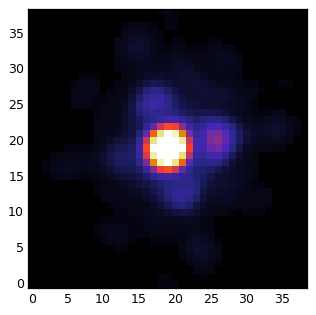

In [11]:
plots(psf, vmin=0, vmax=0.06)

Let's finally define the FWHM in pixels and the pixel-scale for NACO (L band):

In [12]:
pxscale_naco = 0.027
fwhm_naco = 4.6

[Go to the top](#Table-of-contents)

### 3.3. Pre-processing of ADI data

First thing we must do is to put the star at the center of the frames or the center of rotation. Image registration is an important step for any ADI post-processing algorithm and will maximize the SNR of any potential companion.

If we take a look at one single image we will see the dark hole clearly off-center:


Done frame cropping


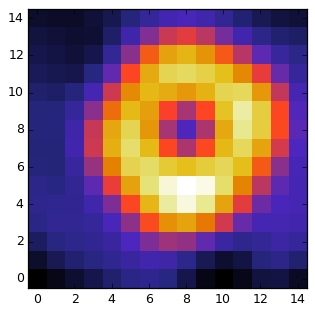

In [13]:
plots(vip.calib.frame_crop(cube_orig[0], 15))

In VIP we have several recentering functions. We could use on this cube either a negative 2d Gaussian fit (assuming the dark hole corresponds witht the position of the star) or a fourier cross-correlation based method (using more information including the bright donut and the speckles). Let's proceed with a negative 2d Gaussian fit: 

In [14]:
from vip.calib import cube_recenter_gauss2d_fit

In [15]:
cube, shy, shx = cube_recenter_gauss2d_fit(cube_orig, 50, 50, fwhm_naco, 
                                           nproc=1, subi_size=1, full_output=True)

-------------------------------------------------------------------
Starting time: 2015-11-08 11:59:55
-------------------------------------------------------------------
Looping through frames
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 0.649 sec
Running time:  0:00:00.674820
-------------------------------------------------------------------


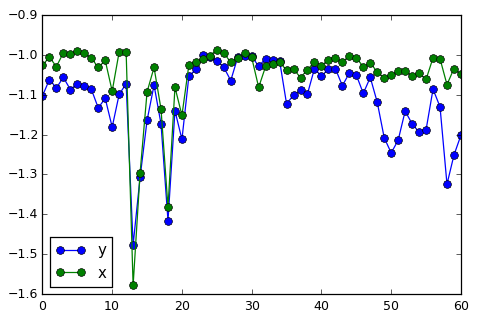

In [16]:
plot(shy, 'o-', label='y')
plot(shx, 'o-', label='x')
legend(loc='best')

Looking at the first frame again we see that the shift applied is correct:


Done frame cropping


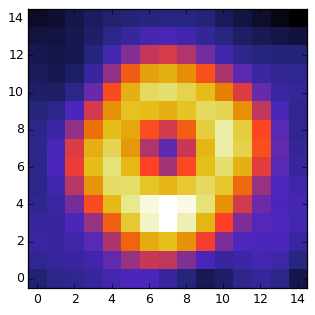

In [17]:
plots(vip.calib.frame_crop(cube[0], 15))

We can inspect the result in ds9:

In [18]:
ds9.display(cube)

The assumption of VIP is that the initial cubes have been calibrated, meaning that routine procedures of dark/sky subtraction and flat-fielding have been performed. VIP includes in its subpackage **calib** a few bad-pixel correction routines, nan-correction function, several bad-frames detection functions as well as pixel upscaling routines. None of this will be used/needed for this cube.

[Go to the top](#Table-of-contents)

### 3.4. ADI median subtraction

First thing we can try is a median subtraction approach (ADI original post-processing):

In [19]:
fr_adi = vip.madi.adi(cube, angs, mode='simple')

-------------------------------------------------------------------
Starting time: 2015-11-08 12:00:04
-------------------------------------------------------------------
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.031957
-------------------------------------------------------------------


Annular mode:

In [20]:
fr_adi_an = vip.madi.adi(cube, angs, fwhm_naco, mode='annular')

-------------------------------------------------------------------
Starting time: 2015-11-08 12:00:06
-------------------------------------------------------------------
N annuli = 5 , FWHM = 4.6 

PA threshold 58.57 is too big, will be set to 36.61
Annulus 1, PA thresh = 36.61, Inn radius = 0.00, Ann center = 4.50 
Annulus 2, PA thresh = 19.52, Inn radius = 9.00, Ann center = 13.50 
Annulus 3, PA thresh = 11.71, Inn radius = 18.00, Ann center = 22.50 
Annulus 4, PA thresh = 8.37, Inn radius = 27.00, Ann center = 31.50 
Annulus 5, PA thresh = 6.67, Inn radius = 35.00, Ann center = 39.50 
Optimized median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.107229
-------------------------------------------------------------------


Plotting:

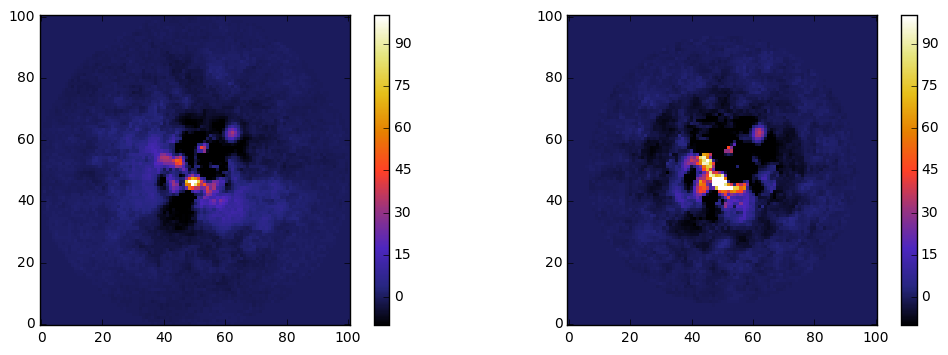

In [21]:
plots(fr_adi, fr_adi_an, rows=1, dpi=100, vmin=-10, vmax=100, colorb=True)

In [22]:
ds9.display(fr_adi, fr_adi_an)

[Go to the top](#Table-of-contents)

### 3.5. Detection function

Let's try the detection module, providing the processed frame, the FWHM in pixels and a PSF (what the planet should look like). Take a look at the help/docstring for an in-depth explanation of the function. 

In [23]:
vip.phot.detection?

Depending on the *mode* and the rest of parameters the results will be different. 
The final step is always to check the SNR defined with *snr_thresh*. By default we adopt the definition of SNR given in Mawet el al. 2014, where they propose to use a student t-test for the problem of planet detection in the case of small sample statistics, which arise in high contrast imaging at small angles. 

The main idea is to test a given speckle against the background resolution elements (at the same angular separation or radial distance from the center):

$$SNR≡ \frac{\overline{x}_1 - \overline{x}_2}{s_2\sqrt{1+\frac{1}{n_2}}}􏰙,$$

where $\overline{x}_1$ is the flux of the tested resolution element (blue dot in figure), $\overline{x}_2$ and $s_2$ are the mean and empirical standard deviation of the fuxes of the background resolution elements (red dots in figure) and $n_2$ the number of such background resolution elements.

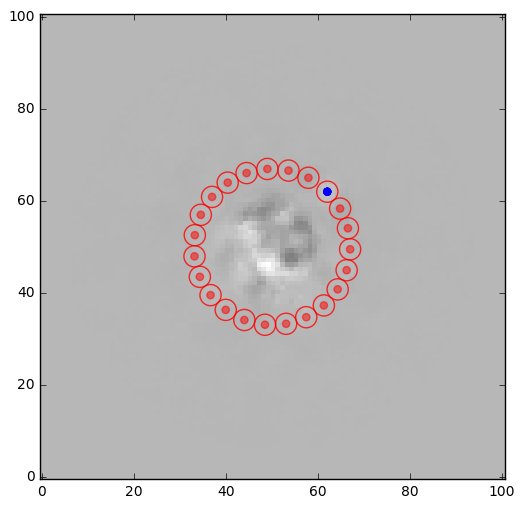

3.3523359936318879

In [24]:
vip.phot.snr_ss(fr_adi_an, (62,62), fwhm_naco, plot=True)

In VIP there is also a function (vip.phot.snr_peakstddev()) for getting the SNR in the classical way (without taking into account resolution elements but considering pixels as independent). In this case the SNR is taken as the ratio of pixel value of the planet (test speckle) and the noise computed as the standard deviation of the pixels in an annulus at the same radial distance from the center of the frame. The diameter of the signal aperture and the annulus width is in both cases 1 FWHM ~ 1 lambda/D.

Let's go back to the detection function and try the computer vision blob-detection method: Laplacian of Gaussian (http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_log). 

FWHM = 4.60345038321

Blobs found: 4
 ycen   xcen
------ ------
55.253 	 59.010
60.870 	 65.683
66.920 	 62.377
71.800 	 71.912
_________________________________________
X,Y = (49.0,45.3)
SNR constraint NOT fulfilled
SNR = 4.426
_________________________________________
X,Y = (55.7,50.9)
SNR constraint NOT fulfilled
SNR = -1.391
_________________________________________
X,Y = (52.4,56.9)
SNR constraint NOT fulfilled
SNR = 0.169
_________________________________________
X,Y = (61.9,61.8)
SNR constraint NOT fulfilled
SNR = 2.362

_________________________________________
Input frame showing all the detected blobs / potential sources:
In RED circles those that did not pass the SNR and 2dGaussian 
fit constraints while in CYAN circles those that passed them.


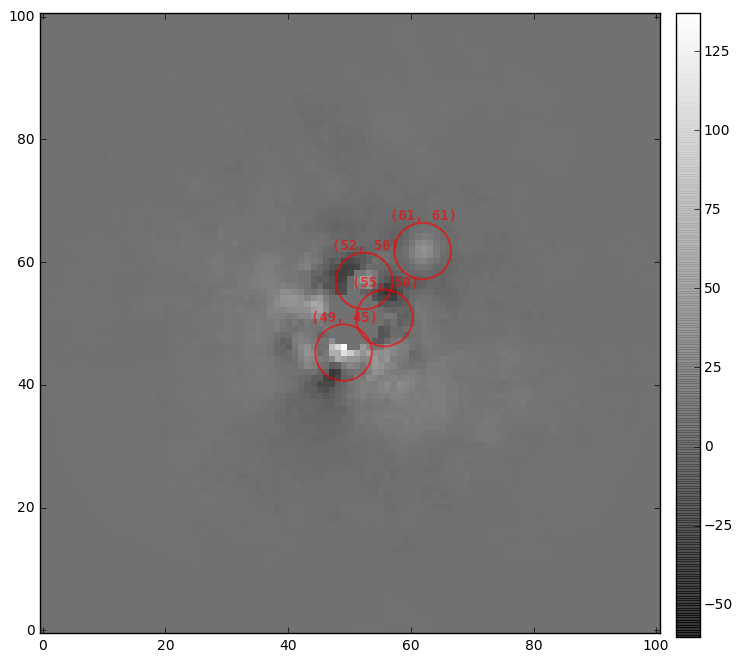

(array([], dtype=float64), array([], dtype=float64))

In [25]:
vip.phot.detection(fr_adi, psf, debug=False, mode='log', snr_thresh=5, 
                   bkg_sigma=3, matched_filter=False)

Planet 'b' is highlighted but with rather small SNR (2.4). We can try the frame obtained with the 'annular' mean subtraction, this time the SNR is 3.4.

[Go to the top](#Table-of-contents)

### 3.6. Full-frame PCA

Now let's try the PCA based algorithms:

In [26]:
fr_pca1 = vip.pca.pca(cube, angs, ncomp=5, mask_center_px=None)

-------------------------------------------------------------------
Starting time: 2015-11-08 12:00:36
-------------------------------------------------------------------
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:00.044368
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.082914
-------------------------------------------------------------------


Here we show the 2 previous frames plus the PCA (rightmost one):

In [27]:
ds9.display(fr_adi, fr_adi_an, fr_pca1)

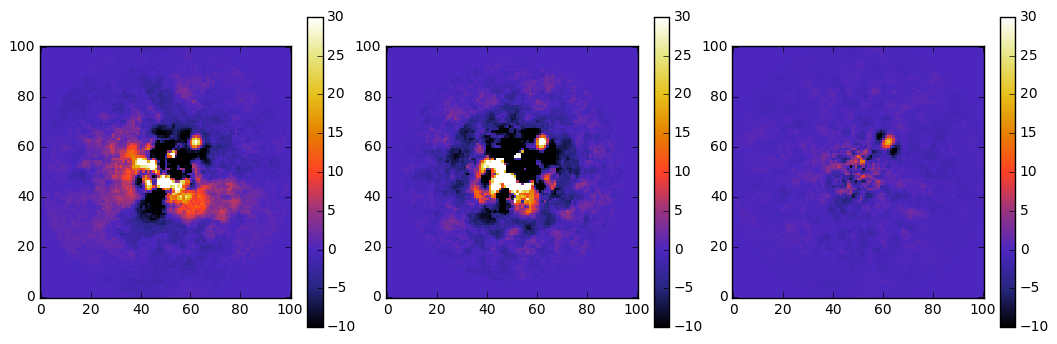

In [28]:
plots(fr_adi, fr_adi_an, fr_pca1, rows=1, dpi=100, vmin=-10, vmax=30, colorb=True)

Let's re-run the detection function on this PCA final frame:

FWHM = 4.60345038321

Blobs found: 3
 ycen   xcen
------ ------
61.954 	 50.569
65.765 	 59.553
71.834 	 71.876
_________________________________________
X,Y = (40.6,52.0)
SNR constraint NOT fulfilled
SNR = 2.901
_________________________________________
X,Y = (49.6,55.8)
SNR constraint NOT fulfilled
SNR = 1.505
_________________________________________
X,Y = (61.9,61.8)


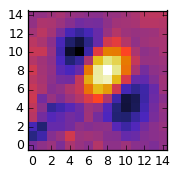

Coordinates of chosen px X,Y = 61.8761971465,61.8342808722
Central pixel SNR: 
SNR = 7.09263584901
Flux = 196.933, Mean Flux BKG aper = -6.769
Stddev BKG aper = 28.060
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 196.933
Mean SNR = 4.899
Max SNR = 6.636, stddev SNRs = 1.491
-----------------------------------------
Fitted X,Y = 62.752,62.669

_________________________________________
Input frame showing all the detected blobs / potential sources:
In RED circles those that did not pass the SNR and 2dGaussian 
fit constraints while in CYAN circles those that passed them.


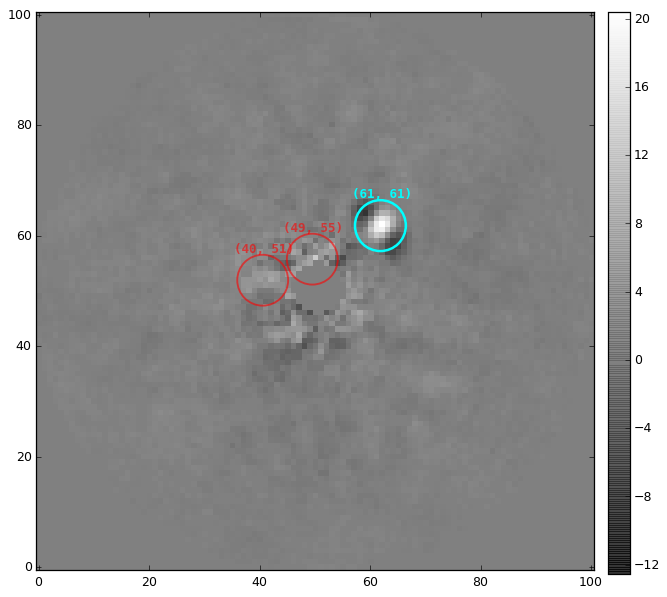

(array([ 61.83428087]), array([ 61.87619715]))

In [29]:
vip.phot.detection(fr_pca1, psf, fwhm_naco, debug=False, mode='log', snr_thresh=5)

Clearly modeling the background (leaked starlight + static and quasi-static speckles) with PCA is better than just a the subtraction of the median frame. We chose 5 principal componenets and we already reached ~7 of SNR. Can we get a better SNR with full-frame PCA?

In [30]:
vip.pca.pca_optimize_snr?

In [31]:
opt_pcs = vip.pca.pca_optimize_snr(cube, angs, fwhm=fwhm_naco, source_xy=(62,62), 
                                   mask_center_px=None, fmerit='max')

-------------------------------------------------------------------
Starting time: 2015-11-08 12:00:55
-------------------------------------------------------------------
Optimal # of PCs = 10

Running time:  0:00:02.997166
-------------------------------------------------------------------
Coordinates of chosen px X,Y = 62,62
Central pixel SNR: 
SNR = 9.15552030274
Flux = 142.474, Mean Flux BKG aper = -7.623
Stddev BKG aper = 16.034
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 142.474
Mean SNR = 8.070
Max SNR = 11.873, stddev SNRs = 2.091
-----------------------------------------
Fitted X,Y = 61.856,61.792


In [32]:
fr_pca2 = vip.pca.pca(cube, angs, ncomp=opt_pcs, mask_center_px=None)

-------------------------------------------------------------------
Starting time: 2015-11-08 12:01:01
-------------------------------------------------------------------
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:00.052087
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.094904
-------------------------------------------------------------------


In [33]:
ds9.display(fr_pca1, fr_pca2)

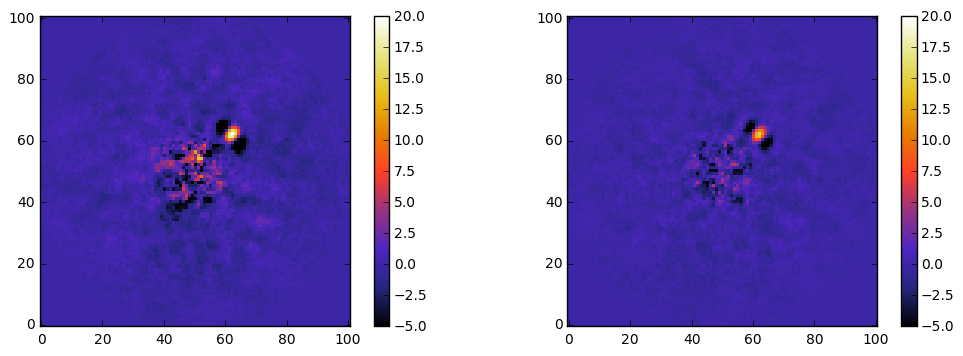

In [34]:
plots(fr_pca1, fr_pca2, rows=1, dpi=100, vmin=-5, vmax=20, colorb=True)

We see an improvement in SNR (11). On the other hand this dataset has a large range of rotation:

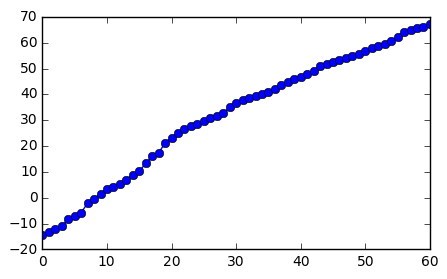

In [35]:
figure(figsize=(5,3))
plot(angs, 'o-')

[Go to the top](#Table-of-contents)

### 3.7. Local PCA

We can exploit the 80 degrees of rotation by using **local PCA** and applying a PA thresholding:

In [36]:
fr_pca_suban20 = vip.pca.subannular_pca(cube, angs, fwhm=fwhm_naco, ncomp=20, 
                                        asize=3, delta_rot=0.5)

-------------------------------------------------------------------
Starting time: 2015-11-08 12:01:09
-------------------------------------------------------------------
# annuli = 3, Ann width = 13, FWHM = 4.600

PCA will be done locally per annulus and per quadrant.

Annulus 1, PA thresh = 20.27, Inn radius = 0.00, Ann center = 6.50 
Done PCA with randsvd for current annulus
Running time:  0:00:00.298291
-------------------------------------------------------------------
Annulus 2, PA thresh = 6.76, Inn radius = 13.00, Ann center = 19.50 
Done PCA with randsvd for current annulus
Running time:  0:00:00.762316
-------------------------------------------------------------------
Annulus 3, PA thresh = 4.18, Inn radius = 25.00, Ann center = 31.50 
Done PCA with randsvd for current annulus
Running time:  0:00:01.607821
-------------------------------------------------------------------
Done derotating and combining.
Running time:  0:00:01.631269
------------------------------------------

We can have a quick report on the frame without running the detection function:

In [37]:
_ = vip.phot.frame_quick_report(fr_pca_suban20, fwhm=fwhm_naco)

Coordinates of Max px X,Y = 62,62
Central pixel SNR: 
SNR = 12.895938573
Flux = 98.033, Mean Flux BKG aper = -3.276
Stddev BKG aper = 7.683
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 98.033
Mean SNR = 7.797
Max SNR = 16.054, stddev SNRs = 3.490
-----------------------------------------
Fitted X,Y = 61.949,61.940


And we gain in SNR (~13 or ~16 if we consider Max SNR) thanks to decreasing the companion self-subtraction. The value of Max SNR tells the maximun SNR reached by shifting the test resolution element in a 1xFWHM aperture (in other words, the maximum in the flux image and the SNR map don't coincide).

In [38]:
ds9.display(fr_adi, fr_pca2, fr_pca_suban20)

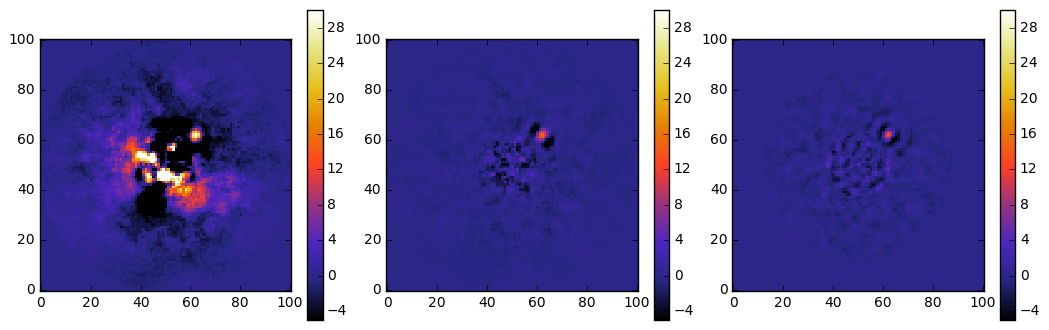

In [39]:
plots(fr_adi, fr_pca2, fr_pca_suban20, rows=1, dpi=100, vmin=-5, vmax=30, colorb=True)

[Go to the top](#Table-of-contents)

### 3.8. SNR map generation

Let's get an SNR map of the last processed frame:

In [40]:
snrmap = vip.phot.snrmap(fr_pca_suban20, fwhm_naco)

-------------------------------------------------------------------
Starting time: 2015-11-08 12:01:25
-------------------------------------------------------------------
SNR map created using 2 processes.
Running time:  0:00:13.564172
-------------------------------------------------------------------


In [41]:
ds9.display(snrmap)

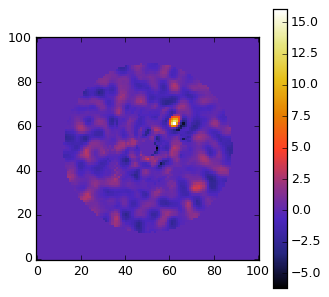

In [44]:
plots(snrmap, colorb=True)

If you want to save your results (1, 2 or 3d arrays) in FITS format please use:

In [45]:
vip.fits.write_fits?

[Go to the top](#Table-of-contents)

### 3.9. Flux and position estimation

Negative fake companion: 


- Estimate the biased position and flux of the planet from the first reduced image.
- Use the measured off-axis PSF as a template to remove the first estimate from the cleaned data cube.
- Process the cube with PCA.
- Iterate on the position and flux until a well-chosen function of merit is minimized.  
        
$chi^2 = sum(|I_j|),$ where $j \in {1,...,N}$ and $N$ the total number of pixels contained in a circular aperture (4xfwhm).

[Go to the top](#Table-of-contents)

#### 3.9.1. Nelder-Mead based optimization

We can get a first guess of the flux and position by running a grid naive minimization and a Nelder-mead based minimization.

In [46]:
vip.negfc.firstguess?


************************************************************
             Planet 0           
************************************************************

Planet 0: flux estimation at the position [62,62], running ...
Step | flux    | chi2r
1/10   400.000   0.605
2/10   433.333   0.578
3/10   466.667   0.559
4/10   500.000   0.535
5/10   533.333   0.523
6/10   566.667   0.511
7/10   600.000   0.507
8/10   633.333   0.517
9/10   666.667   0.538
10/10   700.000   0.559


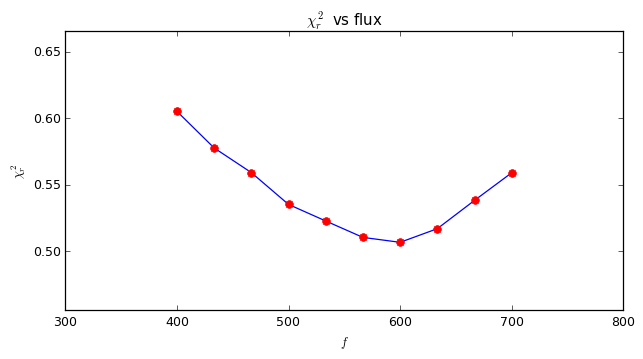

Planet 0: preliminary guess: (r,theta,f) = (16.2634559673,45.0,600.0)
Planet 0: Simplex Nelder-Mead minimization, running ...
Planet 0: Success: True, nit: 52, nfev: 118, chi2r: 0.44026304095
message: Optimization terminated successfully.
Planet 0: first guess: (r_0, theta_0, f_0) = (16.5158405103,44.6413969911,568.047237208)

************************************************************
DONE !
************************************************************
[ 61.60514136] [ 61.75132681]


In [48]:
# Initial guess of the position by examining a flux frame or SNR map
planet_xycoord = np.array([[62,62]])
# Naive minimization of the chi^2 by trying this grid of values for the flux 
f_range = np.linspace(400,700,10)

# If the parameter simplex=True then a Nelder-Mead (simplex) minimization is 
# done based on the preliminary guess of the naive minimization. Here we setup
# the maximum number of iterations and error (see scipy.minimize function)
simplex_options = {'xtol':1e-1, 'maxiter':500, 'maxfev':1000}

# plot with the behaviour of the chi^2 with the naive minimization
figure_options = {'color':'b','marker':'o', 
                  'xlim': [f_range[0]-100,f_range[-1]+100], 
                  'title':r'$\chi^2_{r}$ vs flux'}

r_0, theta_0, f_0 = vip.negfc.firstguess(cube, angs, psf, 10, pxscale_naco,
                                         3*fwhm_naco, 4*fwhm_naco, 
                                         planets_xy_coord=planet_xycoord,
                                         f_range=f_range, simplex=True, 
                                         simplex_options=simplex_options,
                                         display=True, verbose=True, save=False,
                                         figure_options=figure_options)

centy, centx = vip.var. frame_center(cube[0])
posy = r_0 * np.sin(np.deg2rad(theta_0)) + centy
posx = r_0 * np.cos(np.deg2rad(theta_0)) + centx
print posy, posx

Nelder-Mead converged!

[Go to the top](#Table-of-contents)

#### 3.9.2. Planet removal using negative fake companion technique

Let's use the values obtained with the simples optimization:

In [49]:
vip.negfc.cube_planet_free?

In [50]:
plpar_bpicb = np.array([[16.5158405103,44.6413969911,568.047237208]])

cube_emp = vip.negfc.cube_planet_free(plpar_bpicb, cube, angs, psf, pxscale_naco)

In [51]:
fr_pca_emp = vip.pca.pca(cube_emp, angs, ncomp=opt_pcs, verbose=False)

Let's take a look at the PSF of the planet in the PCA full-frame image and the same PSF in the frame resulting of processing the empty cube:

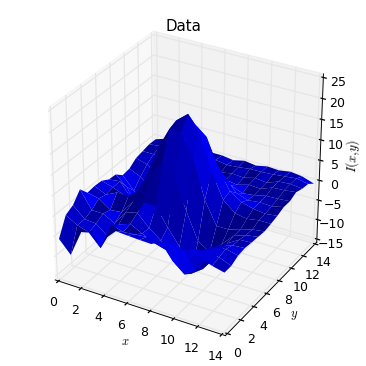

In [52]:
vip.var.plot_surface(fr_pca1, center=(62,62), size=15)

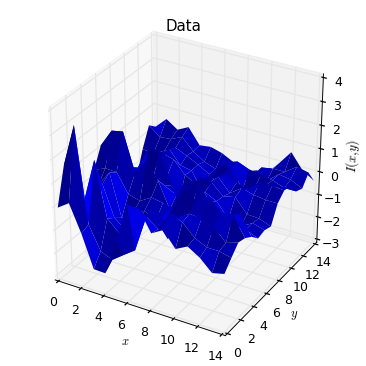

In [53]:
vip.var.plot_surface(fr_pca_emp, center=(62,62), size=15)

In [54]:
ds9.display(fr_pca1, fr_pca_emp)

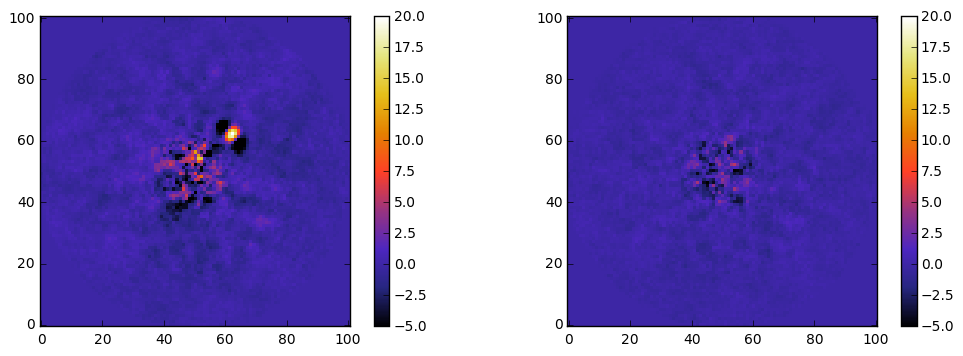

In [55]:
plots(fr_pca1, fr_pca_emp, dpi=100, vmin=-5, vmax=20, colorb=True)

[Go to the top](#Table-of-contents)

#### 3.9.3. Negative fake companion coupled with MCMC 

MCMC is a robust way of obtaining the flux and position since it returns the posterior distributions of the parameters and from them we can generate proper error bars. MCMC is a very costly, computationally, method and we won't show a full run here. 

In [56]:
# Walker initial states: each walker will start in a small ball around 
# this preferred position (first guess using naive or simplex minimization)
initialState = np.array([16.5158405103,44.6413969911,568.047237208])

# Parameters required for calculating the reduced chi^2
ncomp = opt_pcs
annulus_width = 3*fwhm_naco
aperture_radius = 4*fwhm_naco

# for the MCMC sampler
nwalkers, itermin, itermax = (30,100,400)
output_file = 'Cube{}_ncomp_{}_date_{}'.format('x',ncomp,'20151028')

In [57]:
chain = vip.negfc.run_mcmc_astrometry(cube, angs, psf, ncomp, pxscale_naco,                                
                                      annulus_width, aperture_radius, 
                                      cube_ref=None, svd_mode='lapack',
                                      nwalkers=nwalkers, bounds=None,
                                      initialState=initialState,
                                      niteration_min=itermin,
                                      niteration_limit=itermax,
                                      check_maxgap=50, threads=1,
                                      output_file=output_file,
                                      display=False, verbose=False, save=True, 
                                      rhat_threshold=1.01, niteration_supp=0)

Gelman-Rubin test OK 1/3
We have reached the limit number of steps without having converged

The file MCMC_results has been stored in the folder results/Cubex_ncomp_10_date_20151028/


In [58]:
import pickle

# Load the file
with open('./results/Cubex_ncomp_10_date_20151028/MCMC_results','rb') as fi:
    myPickler = pickle.Unpickler(fi)
    mcmc_result = myPickler.load()
    
print mcmc_result.keys()

# Extract the chain
chain = vip.negfc.chain_zero_truncated(mcmc_result['chain'])

['isamples', 'AR', 'chain', 'lnprobability', 'input_parameters']


[Go to the top](#Table-of-contents)

##### 3.9.3.1. Visualizing the MCMC chain: corner plots and walk plots 

Due to the small number of walkers and iterations convergence was not achieved.

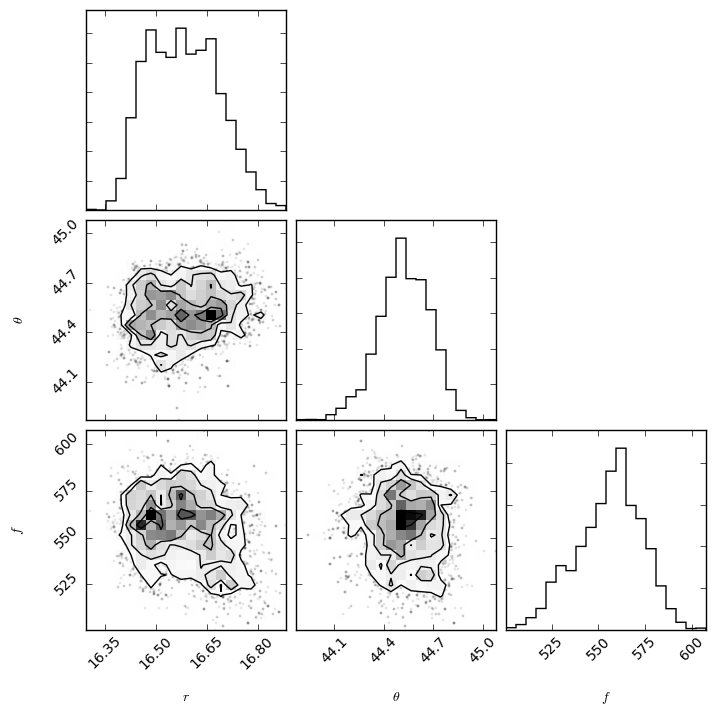

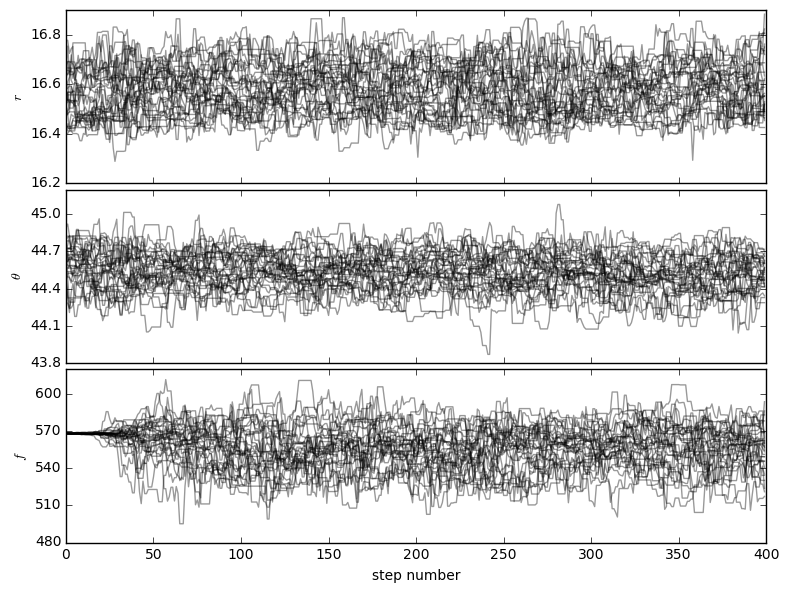

In [59]:
vip.negfc.showPDFCorner(chain)
vip.negfc.showWalk(chain)

[Go to the top](#Table-of-contents)

##### 3.9.3.2. Highly probable values and confidence intervals 

For determining the most highly probable value for each model parameter, as well as the 1-sigma confidence interval:

pourcentage for r: 68.1458333333%


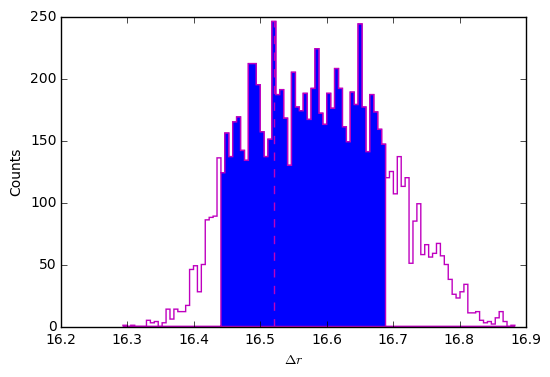

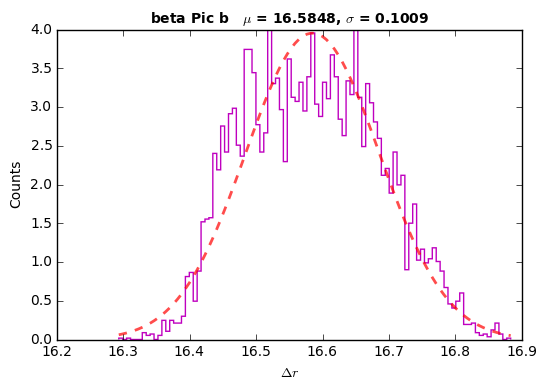

pourcentage for theta: 68.1458333333%


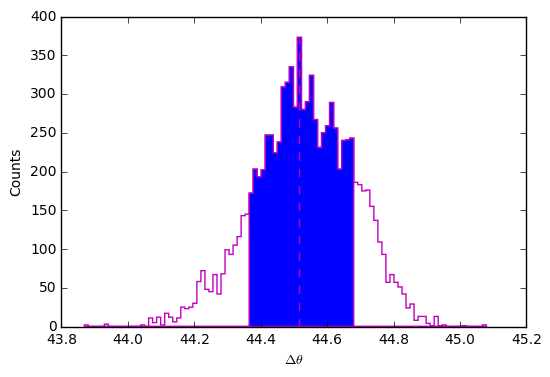

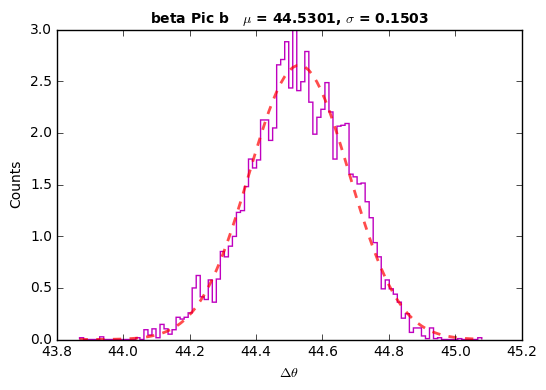

pourcentage for flux: 68.0416666667%


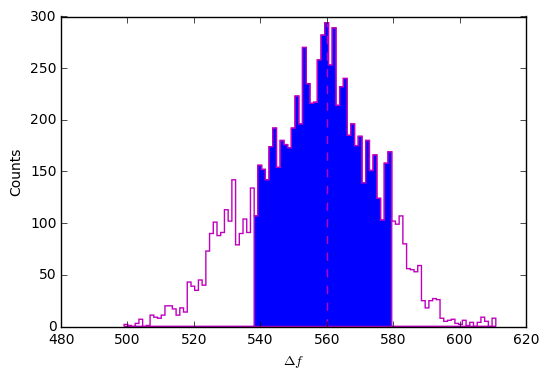

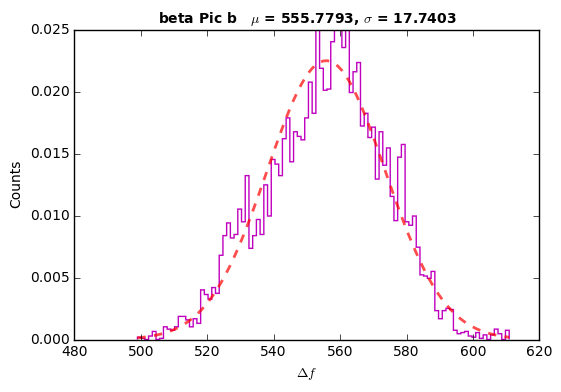


Confidence intervals:
r: 16.5203081123 [-0.0796452322135,0.168139934673]
theta: 44.5167643797 [-0.151373862294,0.163483771277]
flux: 559.964227813 [-21.8252707501,19.5867814424]

Gaussian fit results:
r: 16.5848266077 +-0.100908427417
theta: 44.5301128413 +-0.150280528335
f: 555.779337704 +-17.7403260568


In [60]:
burnin = 0.2
isamples_flat = chain[:,chain.shape[1]//(1/burnin):,:].reshape((-1,3))

val_max, conf = vip.negfc.mcmc_opt.confidence(isamples_flat,
                                              cfd = 68,
                                              gaussianFit = True, 
                                              verbose=True, 
                                              save=True,
                                              title='beta Pic b',
                                              edgecolor = 'm',
                                              facecolor = 'b')

Even though we haven't run the MCMC chain long enough to reach convergence, the result agrees well with the naive and Nelder-Mead minizations. It already gives us confidence intervals based on the posterior distribution of each parameter. Longer run (~few hours) with more walkers and more steps will be needed for convergence and higher confidence in the result.

[Go to the top](#Table-of-contents)

### 3.10. Throughput

Let's measure the throughput of PCA algorithm. That will give us an idea of how much PCA subtracts (biases) the signal from companions as a function of the distance from the center.

In [61]:
vip.phot.throughput?

We need an empty cube if we don't want to bias the throughput (due to the presence of a companion). Let's use the cube with the planet subtracted that we generated in the previous steps.

In [62]:
res_thr = vip.phot.throughput(cube_emp, angs, psf, fwhm_naco, ncomp=opt_pcs, 
                              algo='pca', nbranch=1, full_output=True)

-------------------------------------------------------------------
Starting time: 2015-11-08 12:21:43
-------------------------------------------------------------------
Cube without fake companions processed with pca
Running time:  0:00:00.083795
-------------------------------------------------------------------
Measured annulus-wise noise in resulting frame
Running time:  0:00:00.140151
-------------------------------------------------------------------

Done frame cropping
Fake companions injected in branch 1 (pattern 1/3)
Running time:  0:00:00.235794
-------------------------------------------------------------------
Cube with fake companions processed with pca
Running time:  0:00:00.312862
-------------------------------------------------------------------
Measured the annulus-wise throughput of pca
Running time:  0:00:00.313317
-------------------------------------------------------------------
Fake companions injected in branch 1 (pattern 2/3)
Running time:  0:00:00.394272
--

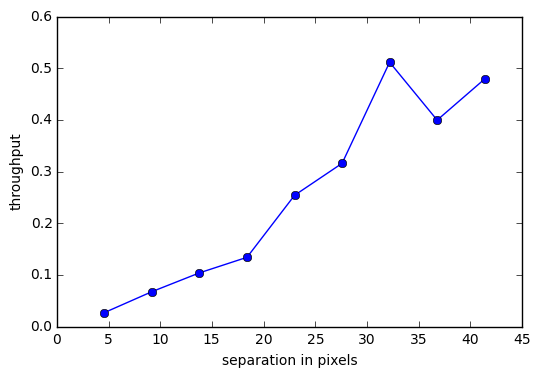

In [63]:
plot(res_thr[2], res_thr[0][0,:], 'o-')
ylabel('throughput')
xlabel('separation in pixels')
legend()

Let's compare with the local PCA:

In [65]:
res_thr2 = vip.phot.throughput(cube_emp, angs, psf, fwhm_naco, ncomp=opt_pcs, 
                               algo='spca', nbranch=1, full_output=True, 
                               delta_rot=1, min_frames_pca=5, verbose=False)

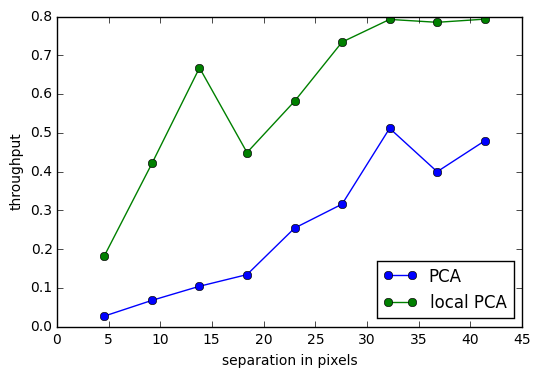

In [66]:
plot(res_thr[2], res_thr[0][0,:], 'o-', label='PCA')
plot(res_thr2[2], res_thr2[0][0,:], 'o-', label='local PCA')
ylabel('throughput')
xlabel('separation in pixels')
legend(loc='best')

We clearly see the gain in throughput by applying a parallactic angle rejection in our annular PCA processing.

[Go to the top](#Table-of-contents)

### 3.11. Contrast curve generation

Now let's see how to generate 5-sigma contrast curves for PCA-ADI. *Starphot* is the flux of the star (aperture photometry of the non-coronagraphic PSF before normalization).

In [68]:
starphot = 764939.6

Measuring the throughput 

SIGMA=5
STARPHOT=764939.6


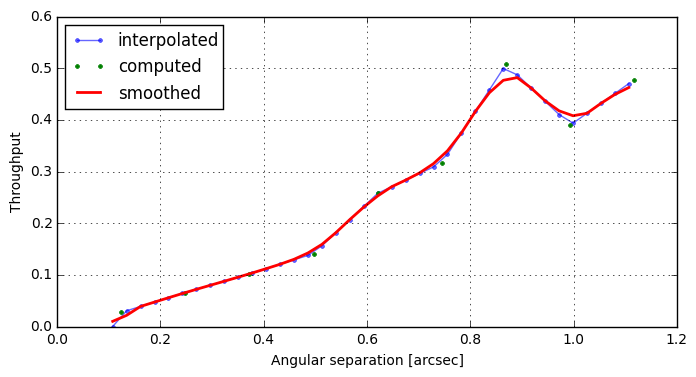

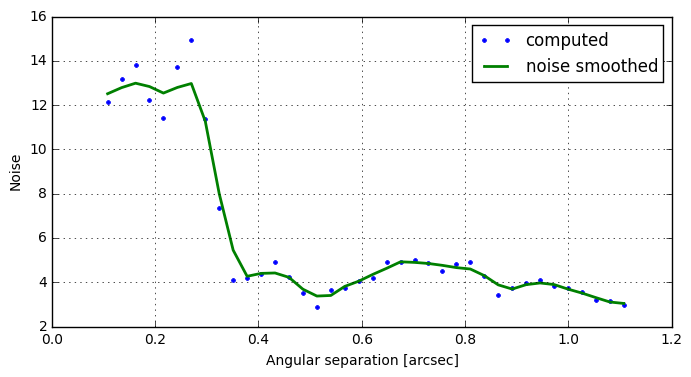

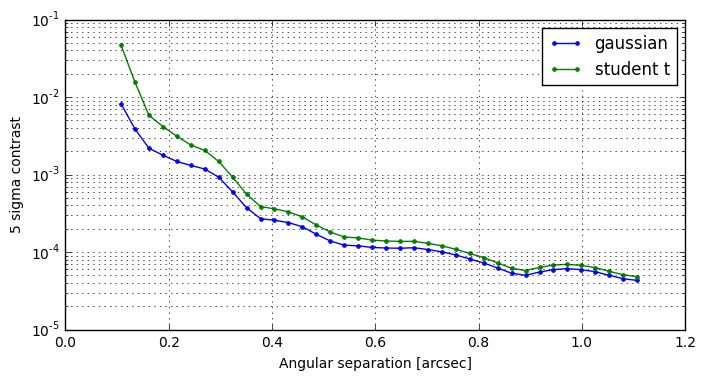

In [80]:
_ = vip.phot.contrcurve.contrast_curve(cube_emp, angs, psf, fwhm_naco, 
                                       pxscale_naco, starphot, sigma=5, 
                                       nbranch=1, ncomp=opt_pcs, debug=True)

[Go to the top](#Table-of-contents)

### 3.12. Generating synthetic planets

Now that we have an empty cube we can inject fake companions in there:

In [266]:
vip.phot.inject_fcs_cube?

In [56]:
cubefc = vip.phot.inject_fcs_cube(cube_emp, psf, angs, 150, pxscale_naco, 
                                  [pxscale_naco*35], theta=240, n_branches=1)

In [57]:
fr_pca3 = vip.pca.pca(cubefc, angs, ncomp=15)

-------------------------------------------------------------------
Starting time: 2015-10-29 15:42:05
-------------------------------------------------------------------
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:00.060153
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.103482
-------------------------------------------------------------------


In [58]:
ds9(fr_pca3)

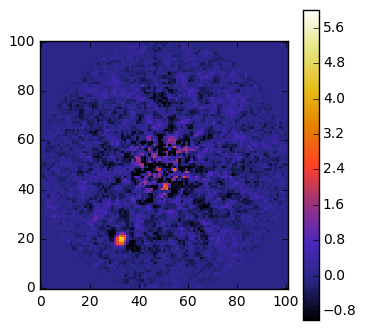

In [59]:
plots(fr_pca3, dpi=100, vmin=-1, vmax=6, colorb=True)

[Go to the top](#Table-of-contents)

### 3.13. Processing RDI data

In case we have a reference star, we can plug it in in the PCA function to perform Reference Star Differential Imaging.

#### 3.13.1. PCA with a reference

We'll simulate a set of references using the cube with the planet subtracted. Let's mean-collapse every 3 frames to end up with 20 frames and upscale a bit the frames. We do this to decorrelate the frames and make them less similar (that changes slightly the low-rank inner structure).  

In [53]:
cube_ref = vip.calib.cube_subsample(cube_emp, n=3, mode='mean')


Initial # of frames and window are not multiples. A few frames were dropped.


In [54]:
cube_ref = vip.calib.cube_px_resampling(cube_ref, scale=1.1)
cube_ref = vip.calib.cube_crop_frames(cube_ref, 101)


Cube cropped with new size [20,101,101].


We plug in the reference cube in the PCA function. This reference library of frames is used to extract the principal components onto which we'll project our science (target) frames. Let's test it with the syntethic companion previously injected.

In [159]:
fr_rdi = vip.pca.pca(cubefc, angs, cube_ref, ncomp=18)

-------------------------------------------------------------------
Starting time: 2015-10-29 23:07:21
-------------------------------------------------------------------
Done creating and centering the matrix
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:00.056994
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.100467
-------------------------------------------------------------------


In [160]:
ds9(fr_pca3, fr_rdi)

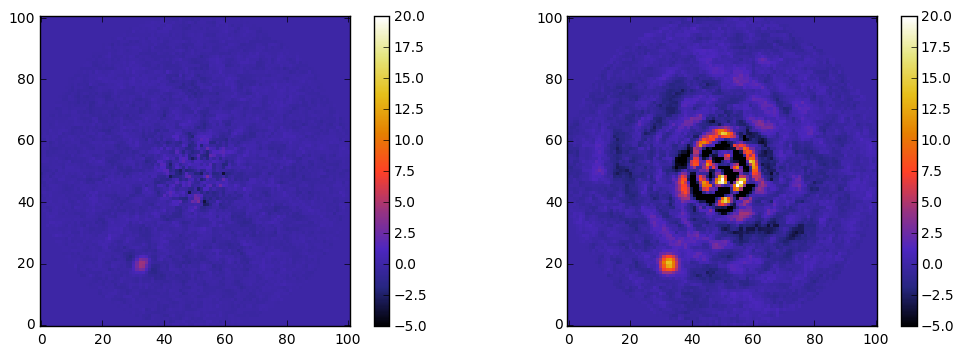

In [65]:
plots(fr_pca3, fr_rdi, dpi=100, vmin=-5, vmax=20, colorb=True)

[Go to the top](#Table-of-contents)

#### 3.13.2. Flux and position estimation for RDI

Let's test this with the syntethic cube. Now both functions firtguess() and run_mcmc_astrometry() will accept a parameter *cube_ref* that will trigger the RDI PCA.


************************************************************
             Planet 0           
************************************************************

Planet 0: flux estimation at the position [33,19], running ...
Step | flux    | chi2r
1/20   50.000   2.059
2/20   63.158   2.022
3/20   76.316   2.001
4/20   89.474   1.985
5/20   102.632   1.980
6/20   115.789   1.982
7/20   128.947   1.992
8/20   142.105   2.011
9/20   155.263   2.033
10/20   168.421   2.056
11/20   181.579   2.080
12/20   194.737   2.109
13/20   207.895   2.141
14/20   221.053   2.177
15/20   234.211   2.216
16/20   247.368   2.255
17/20   260.526   2.296
18/20   273.684   2.337
19/20   286.842   2.379
20/20   300.000   2.424


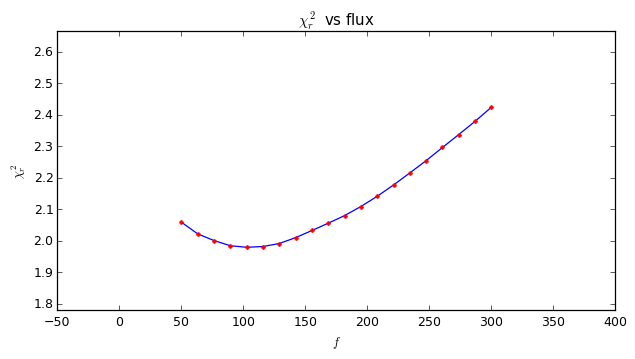

Planet 0: preliminary guess: (r,theta,f) = (36.0347054935,240.945395901,102.631578947)
Planet 0: Simplex Nelder-Mead minimization, running ...
Planet 0: Success: True, nit: 100, nfev: 251, chi2r: 1.61651611328
message: Optimization terminated successfully.
Planet 0: first guess: (r_0, theta_0, f_0) = (33.7982522584,239.785701016,173.392522354)

************************************************************
DONE !
************************************************************
[ 20.79326602] [ 32.99151546]


In [142]:
# Initial guess of the position by examining a flux frame or SNR map
planet_xycoord = np.array([[33,19]])
# Naive minimization of the chi^2 by trying this grid of values for the flux 
f_range = np.linspace(50,300,20)

# If the parameter simplex=True then a Nelder-Mead (simplex) minimization is 
# done based on the preliminary guess of the naive minimization. Here we setup
# the maximum number of iterations and error (see scipy.minimize function)
simplex_options = {'xtol':1e-8, 'maxiter':500, 'maxfev':1000}

# plot with the behaviour of the chi^2 with the naive minimization
figure_options = {'color':'b','marker':'.', 
                  'xlim': [f_range[0]-100,f_range[-1]+100], 
                  'title':r'$\chi^2_{r}$ vs flux'}

r_0, theta_0, f_0 = vip.negfc.firstguess(cubefc, angs, psf, opt_pcs, pxscale_naco,
                                         3*fwhm_naco, 4*fwhm_naco, 
                                         planets_xy_coord=planet_xycoord,
                                         cube_ref=cube_ref, svd_mode='lapack',
                                         f_range=f_range, simplex=True, 
                                         simplex_options=simplex_options,
                                         display=True, verbose=True, save=False,
                                         figure_options=figure_options)

centy, centx = vip.var. frame_center(cube[0])
posy = r_0 * np.sin(np.deg2rad(theta_0)) + centy
posx = r_0 * np.cos(np.deg2rad(theta_0)) + centx
print posy, posx

The injected parameters of this companion are (r_0, theta_0, f_0) = (35, 240, 150) 

Now let's try the MCMC method:

In [146]:
# Walker initial states: each walker will start in a small ball around 
# this preferred position (first guess using naive or simplex minimization)
initialState = np.array([33.7982522584,239.785701016,173.392522354])

# for the MCMC sampler
nwalkers, itermin, itermax = (20,100,500)
output_file = 'Cube{}_ncomp_{}_date_{}'.format('x',ncomp,'20151028')

chain2 = vip.negfc.run_mcmc_astrometry(cubefc, angs, psf, opt_pcs, pxscale_naco,                                
                                       3*fwhm_naco, 4*fwhm_naco, 
                                       cube_ref=cube_ref, svd_mode='lapack',
                                       nwalkers=nwalkers, bounds=None,
                                       initialState=initialState,
                                       niteration_min=itermin,
                                       niteration_limit=itermax,
                                       check_maxgap=50, threads=1,
                                       output_file=output_file,
                                       display=False, verbose=False, save=False, 
                                       rhat_threshold=1.01, niteration_supp=0)


We have reached the limit number of steps without having converged


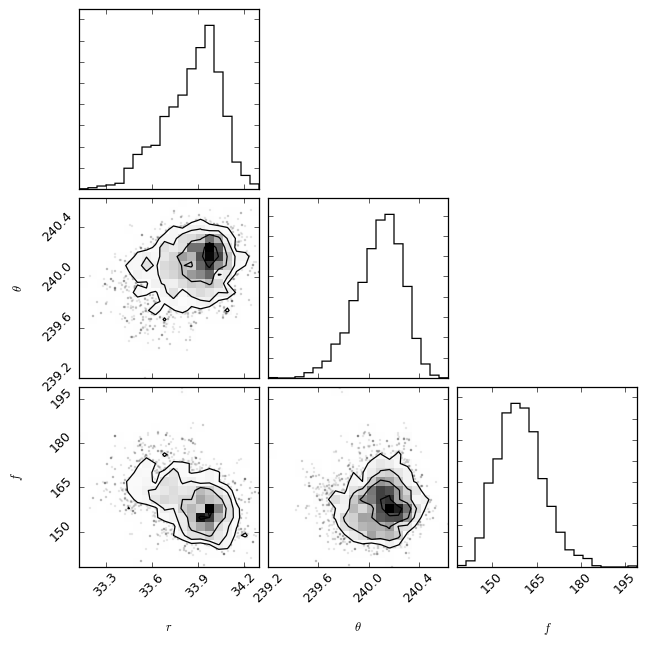

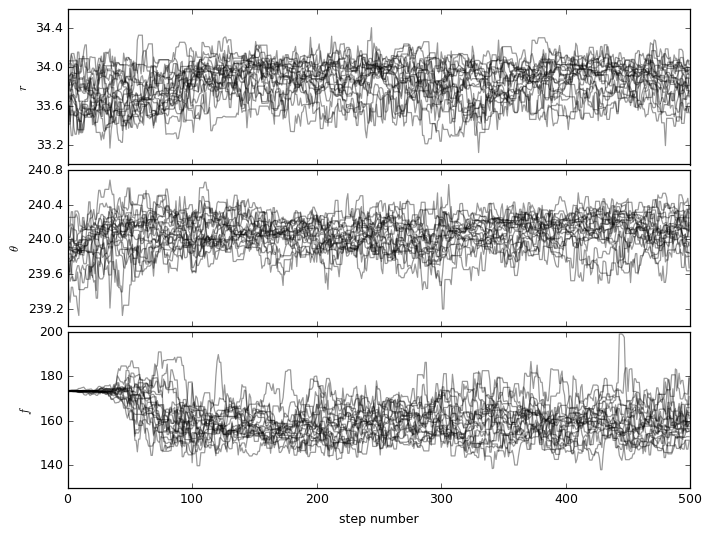

In [145]:
vip.negfc.mcmc_opt.showPDFCorner(chain2)
vip.negfc.mcmc_opt.showWalk(chain2)

Even though we haven't run the MCMC chain long enough to reach convergence, we can confirm visually that the result was getting closer to the grountruth (r_0, theta_0, f_0) = (35, 240, 150).

[Go to the top](#Table-of-contents)

### 3.14. Processing IFS data

Let's try processing data cubes result of a different observing technique. In this case we will have a SPHERE IFS 4d cube [# channels, # adi-frames, Y, X] with syntethic companions injected. Unfortunately the cubes are too big to be shared through github (few GB). You won't be able to re-run this cells, but they will serve to illustrate the PCA processing of an IFS cube.

In [66]:
cube_ifs = vip.fits.open_fits(cube_ifs)


Fits HDU:0 data successfully loaded. Data shape: [39,80,320,320]


In this case we have 39 spectral channels and 80 ADI multi-spectral frames (with 39 wavelengths) with size 320x320.

In [67]:
angs_ifs = vip.fits.open_fits(angs_ifs)


Fits HDU:0 data successfully loaded. Data shape: [80]


In [68]:
scal_vec = vip.fits.open_fits(scal_vec)


Fits HDU:0 data successfully loaded. Data shape: [39]


We create the scaling factors using the central wavelength of each channel:

In [69]:
scal_vec = scal_vec.max()/scal_vec

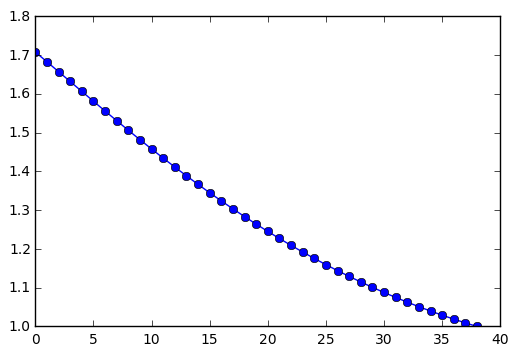

In [70]:
plot(scal_vec, 'o-')

In [325]:
scal_vec = vip.calib.check_scal_vector(scal_vec)

[Go to the top](#Table-of-contents)

#### 3.14.1. PCA of a single multi spectral frame

In this case we assume we have a cube (3d array) that contains 1 frame at multiple spectral channels. The frames need to be re-scaled (to match the longest wavelenght) in order to get a sequence where the planet moves radially with respect to the speckles. Then PCA is applied on this re-scaled cube. We can simulate this by slicing our cube:

In [202]:
frame_ifs10 = cube_ifs[:,10,:,:]

In [219]:
frame_ifs10.shape

(39, 320, 320)

Let's take a look at the stretching of the quasi-static speckle field as the wavelenght increases:

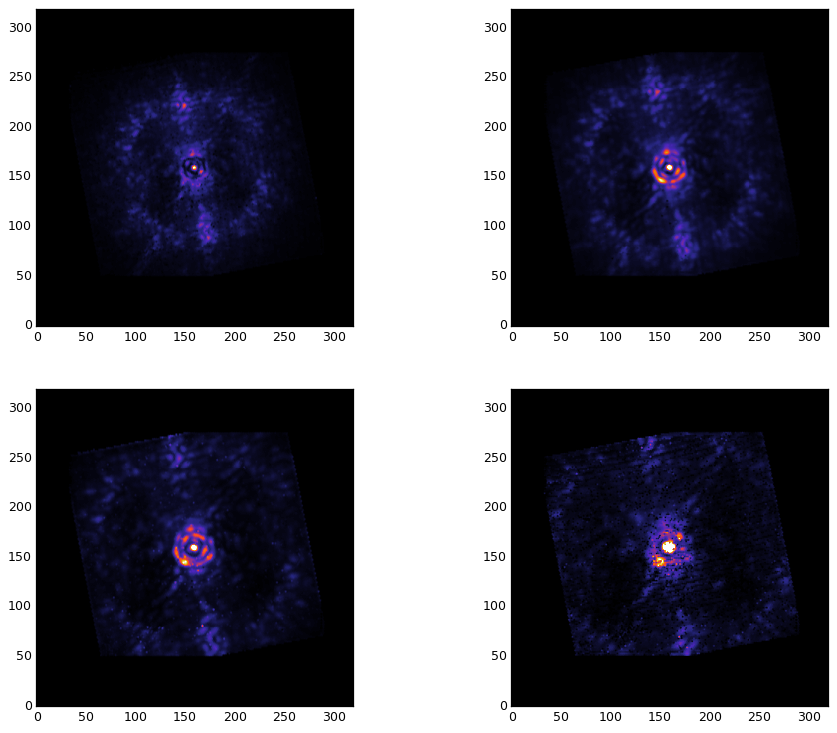

In [229]:
plots(frame_ifs10[0], frame_ifs10[12], frame_ifs10[24], frame_ifs10[38],
      vmin=0, vmax=0.05, rows=2)

Let's process it:

In [204]:
fr_pca_ifs = vip.pca.pca(frame_ifs10, None, scale_list=scal_vec,
                         svd_mode='randsvd', ncomp=2, full_output=False, 
                         verbose=True, debug=False)

-------------------------------------------------------------------
Starting time: 2015-10-30 07:10:31
-------------------------------------------------------------------
39 spectral channels in IFS cube
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:01.052189
-------------------------------------------------------------------
Done re-scaling and combining
Running time:  0:00:01.496295
-------------------------------------------------------------------


In [205]:
ds9(fr_pca_ifs)

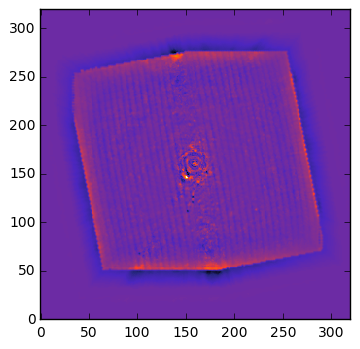

In [214]:
plots(fr_pca_ifs, dpi=100, size=4)

Detailed visual inspection shows some blobs (point-like sources) at low SNR. 

[Go to the top](#Table-of-contents)

#### 3.14.2. Two-stage PCA of several multi spectral frames

Let's use the whole cube, the 80 frames (IFS + ADI), by computing a two-stage PCA. We need to provide the function with all the information we have: the 4d cube, the PAs, the scaling factors, and two different number of principal components (ncomp and ncomp2). Please read the function docstring for more information.

In [209]:
vip.pca.pca?

In [199]:
fr_pca_ifs_adi = vip.pca.pca(cube_ifs, -angs_ifs, scale_list=scal_vec,
                             svd_mode='randsvd', ncomp=2, ncomp2=20, 
                             mask_center_px=10, scaling=None,
                             full_output=False, verbose=True, debug=False)

-------------------------------------------------------------------
Starting time: 2015-10-30 01:09:05
-------------------------------------------------------------------
39 spectral channels in IFS cube
80 ADI frames in all channels
Looping through ADI frames
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 108.383 sec
Done PCA per ADI multi-spectral frame, de-rotating and combining
Running time:  0:01:49.394797
-------------------------------------------------------------------


In [200]:
ds9(fr_pca_ifs_adi)

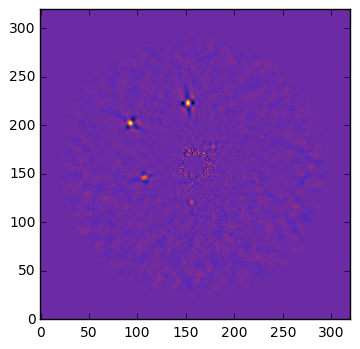

In [218]:
plots(fr_pca_ifs_adi, dpi=100, size=4)

And voila! By carefully tunning how many PCs we will retain in each stage we reach a nice result, showing clearly the 5 fake companions. This is an example of how fast VIP can be: processing a 2.6 GB IFS cube in ~2 minutes!

[Go to the top](#Table-of-contents)

### 3.15. Additional functionality

We won't provide the FITS files for the following items (couple of pre-processing tasks) due to size constraints.

#### 3.15.1. Bad frames detection

I load here an IRDIS data cube. It has 52 ADI frames with size 1024x2048.

In [231]:
cube_irdis = vip.fits.open_fits(irdis)


Fits HDU:0 data successfully loaded. Data shape: [52,1024,2048]


Let's first crop one of the channels of IRDIS:

In [233]:
cube_left = vortex.calib.cube_crop_frames(cube_irdis, 201, 520, 487)


Cube cropped; new size [52,201,201] centered at (520,487).


In [236]:
ds9(cube_left)

Here we see a good frame and a bad frame that needs to be discarded before post-processing (e.g. PCA-ADI):

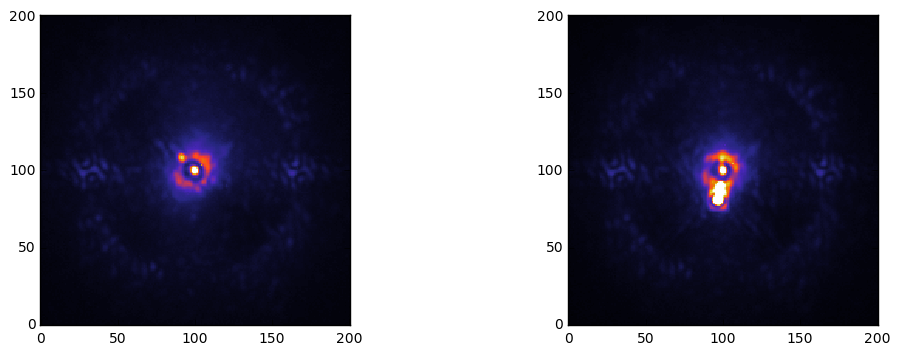

In [240]:
plots(cube_left[0], cube_left[49], dpi=100, vmin=0, vmax=7000, size=4)

Here it's illustrated how to create a widget to modify the parameters of two bad frames detection functions in VIP:

In [251]:
vip.calib.cube_detect_badfr_pxstats?

In [252]:
vip.calib.cube_detect_badfr_correlation?

In [249]:
from IPython.html.widgets import FloatSlider as FlSlider
from IPython.html.widgets import Dropdown, interact_manual, interact
from IPython.display import display, clear_output

def detect_badfr_widget(cube, method='corr', ref=0):
    """
    """
    def slider_vpxst(upsig):
        func = vip.calib.cube_detect_badfr_pxstats
        print "upper sigma = {}".format(upsig)
        fwhm = 4
        gind, bind = func(cube, mode='annulus', in_radius=fwhm, width=3*fwhm,
                          top_sigma=upsig, low_sigma=1, plot=True)
        #print "bad frames : {}".format(bind)
    def slider_corr(perc):
        func = vip.calib.cube_detect_badfr_correlation
        print "perc = {}".format(perc)
        gind, bind = func(cube, ref, dist='pearson', percentile=perc, plot=True)
        #print "bad frames : {}".format(bind)
    
    if method=='pxstat':
        interact(slider_vpxst, upsig=FlSlider(min=0.0, max=2.0, 
                                                     value=1.0, step=0.1))
    elif method=='corr':
        interact(slider_corr, perc=FlSlider(min=1.0, max=50.0,
                                                   value=17.0, step=0.5))



perc = 3.0
-------------------------------------------------------------------
Starting time: 2015-10-30 08:06:33
-------------------------------------------------------------------
Done detecting bad frames from cube: 2 out of 52 (3.85%)
Running time:  0:00:00.054670
-------------------------------------------------------------------


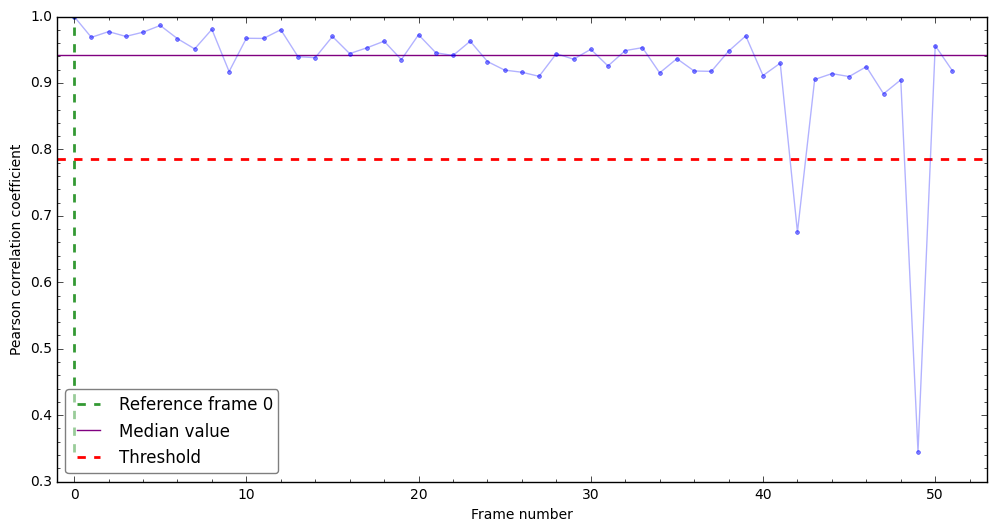

In [250]:
detect_badfr_widget(cube_left, method='corr', ref=0)

You can change method to 'pxstat' and change with the slider the value of the parameter. Once we set a value, we call the actual function to get the indices and we slice the cube, keeping the good frames only. The same indices can be used to slice the PA vector.

In [254]:
goind, baind = vip.calib.cube_detect_badfr_correlation(cube_left, 0,
                                                       dist='pearson', 
                                                       percentile=3)

-------------------------------------------------------------------
Starting time: 2015-10-30 08:08:35
-------------------------------------------------------------------
Done detecting bad frames from cube: 2 out of 52 (3.85%)
Running time:  0:00:00.009087
-------------------------------------------------------------------


In [255]:
print baind

[42 49]


Let's take a look at the result:

In [256]:
ds9(cube_left[goind])

[Go to the top](#Table-of-contents)

#### 3.15.2. Centering with Radon Transform

Radon Transform maps lines onto points, we can then use speckles (and/or satellite spots) to estimate the location of the star in a coronagraphic image (see Pueyo et al. 2015).

Location of the star is estimated by calculating the radon transform of a given broadband image over a grid of trial centers (x0,y0), and find the location that maximizes the modulus (square) of the Radon transform over the s = 0 horizontal axis.

In [14]:
fr_broad = vip.fits.open_fits(path_broad)
fr_broad = vip.calib.frame_crop(fr_broad, 151, 472, 472)


Fits HDU:0 data successfully loaded. Data shape: [940,940]

Done frame cropping


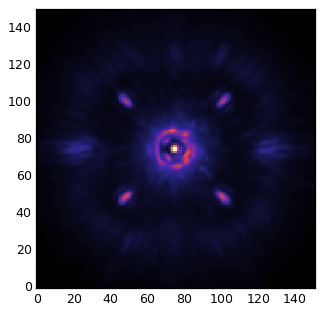

In [15]:
plots(fr_broad, size=4)

-------------------------------------------------------------------
Starting time: 2015-10-30 08:47:37
-------------------------------------------------------------------


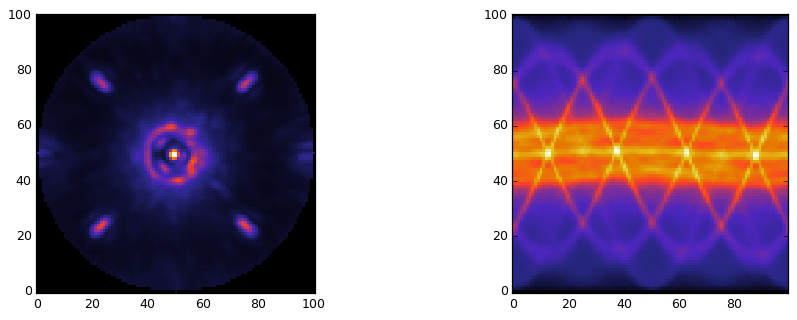

56909203.6446
Done 1681 radon transform calls distributed in 2 processes


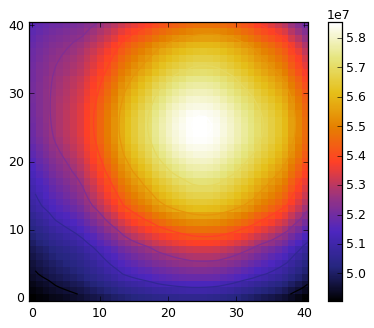

Cost function max: 58545251.067
Cost function # maxima: 1
Finished grid search radon optimization. Y=0.50000, X=0.40000
Running time:  0:00:31.724620
-------------------------------------------------------------------


(0.5, 0.40000000000000036)

In [16]:
vip.calib.frame_center_radon(fr_broad, cropsize=101, wavelet=False, 
                             mask_center=None, hsize=2, step=0.1, nproc=2, 
                             debug=True)

[Go to the top](#Table-of-contents)

### 3.16. Final words

I hope this tutorial was useful. Unfortunately, showing all of VIP functionalities here won't be possible, so please explore it on your own. We currently work on the paper describing VIP and a more detailed documentation (webpage) for it.

[Go to the top](#Table-of-contents)